<a href="https://colab.research.google.com/github/SebastianJaramilloo/Tareas_Aprendizaje_Automatico-/blob/main/Taller1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<a href="https://colab.research.google.com/github/andres-merino/AprendizajeAutomaticoInicial-05-N0105/blob/main/2-Ejercicios/02-Prep-Datos-Metricas-Modelos.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<table style="border: none; border-collapse: collapse;">
    <tr>
        <td style="width: 20%; vertical-align: middle; padding-right: 10px;">
            <img src="https://i.imgur.com/nt7hloA.png" width="100">
        </td>
        <td style="width: 2px; text-align: center;">
            <font color="#0030A1" size="7">|</font><br>
            <font color="#0030A1" size="7">|</font>
        </td>
        <td>
            <p style="font-variant: small-caps;"><font color="#0030A1" size="5">
                <b>Facultad de Ciencias Exactas, Naturales y Ambientales</b>
            </font> </p>
            <p style="font-variant: small-caps;"><font color="#0030A1" size="4">
                Aprendizaje Automático Inicial &bull; Preparación de Datos y Métricas de Evaluación
            </font></p>
            <p style="font-style: oblique;"><font color="#0030A1" size="3">
                Nombre y Apellido &bull; Fecha
            </font></p>
        </td>  
    </tr>
</table>

---
## <font color='264CC7'> Introducción </font>

A lo largo de este taller veremos como aplicar diferentes técnicas para la carga y preparación de datos y las métricas de modelos.
   
Para eso necesitaremos las siguientes librerías:

In [36]:
# Paquetes necesarios
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
import numpy as np
from sklearn.manifold import TSNE


---
## <font color='264CC7'> Lectura de Datos </font>


Primero, necesitas cargar el conjunto de datos "Boston house prices", que contiene información sobre el valor de las casas en diferentes áreas de Boston basado en múltiples factores. Este conjunto de datos está disponible para su descarga [aquí](https://raw.githubusercontent.com/rupakc/UCI-Data-Analysis/refs/heads/master/Boston%20Housing%20Dataset/Boston%20Housing/housing.data); la descripción de las variables  de puede encontrar [aquí](https://github.com/rupakc/UCI-Data-Analysis/blob/master/Boston%20Housing%20Dataset/Boston%20Housing/housing.names).

En los ejercicios de esta actividad, usaremos como variable objetivo para regresión "MEDV", que representa la mediana del valor de las casas en una zona de Boston (en miles de dólares, k$); y para clasificación, la variable "CHAS", que indica si la casa está cerca del río Charles (1) o no (0).

<div style="background-color: #edf1f8; border-color: #264CC7; border-left: 5px solid #264CC7; padding: 0.5em;">
<strong>Ejercicio:</strong><br>
    Carga el conjunto de datos "boston house-prices dataset" y muestra:
<ul>
  <li>El número y nombre de los atributos.</li>
  <li>El número de filas del conjunto de datos.</li>
  <li>Verifica si hay "missing values" y en qué columnas.</li>
</ul>
</div>

In [37]:
# URL del dataset
url = "https://raw.githubusercontent.com/rupakc/UCI-Data-Analysis/refs/heads/master/Boston%20Housing%20Dataset/Boston%20Housing/housing.data"

# Nombres de columnas según la documentación
columnas = [
    "CRIM", "ZN", "INDUS", "CHAS", "NOX", "RM",
    "AGE", "DIS", "RAD", "TAX", "PTRATIO", "B",
    "LSTAT", "MEDV"
]

# Cargar dataset
df = pd.read_csv(url, sep=r"\s+", header=None, names=columnas)

# ---------------------------------------
# 1. Número y nombre de los atributos
# ---------------------------------------
print("Número de atributos:", len(df.columns))
print("Nombres de los atributos:")
print(df.columns.tolist())

# ---------------------------------------
# 2. Número de filas del conjunto de datos
# ---------------------------------------
print("\nNúmero de filas:", len(df))

# ---------------------------------------
# 3. Verificar missing values
# ---------------------------------------
print("\nMissing values por columna:")
print(df.isnull().sum())


Número de atributos: 14
Nombres de los atributos:
['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX', 'PTRATIO', 'B', 'LSTAT', 'MEDV']

Número de filas: 506

Missing values por columna:
CRIM       0
ZN         0
INDUS      0
CHAS       0
NOX        0
RM         0
AGE        0
DIS        0
RAD        0
TAX        0
PTRATIO    0
B          0
LSTAT      0
MEDV       0
dtype: int64


---
## <font color='264CC7'> Análisis de los datos </font>

### <font color='264CC7'> Análisis estadístico básico </font>

<div style="background-color: #edf1f8; border-color: #264CC7; border-left: 5px solid #264CC7; padding: 0.5em;">
<strong>Ejercicio:</strong><br>
Realiza un análisis estadístico básico:
<br>

<ul>
  <li>Variables categóricas:</li>
     <ul>
      <li>Calcula la frecuencia.</li>
      <li>Realiza un gráfico de barras.</li>
    </ul>
  <li>Variables numéricas:</li>
    <ul>
      <li>Calcula estadísticos descriptivos básicos como media, mediana, desviación estándar, entre otros.</li>
      <li>Realiza un histograma para las variables INDUS, AGE y MEDV.</li>
    </ul>
</ul>
    
<hr>
Sugerencia: Puedes usar la librería 'pandas' y sus funciones 'describe' y 'value_counts', así como las funciones 'bar' e 'hist' de matplotlib.
</div>


##Variables categóricas

Frecuencia de CHAS:

CHAS
0    471
1     35
Name: count, dtype: int64


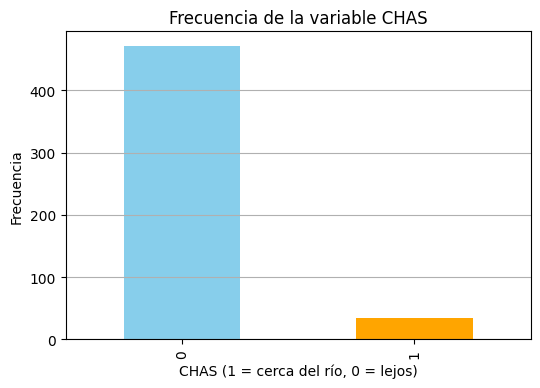

In [38]:
# Variable categórica: CHAS
print("Frecuencia de CHAS:\n")
print(df["CHAS"].value_counts())

# Gráfico de barras
plt.figure(figsize=(6,4))
df["CHAS"].value_counts().plot(kind="bar", color=['skyblue','orange'])
plt.title("Frecuencia de la variable CHAS")
plt.xlabel("CHAS (1 = cerca del río, 0 = lejos)")
plt.ylabel("Frecuencia")
plt.grid(axis='y')
plt.show()


##Variables numéricas

In [39]:
print("Estadísticos descriptivos de variables numéricas:\n")
df.describe()


Estadísticos descriptivos de variables numéricas:



,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063,22.532806
std,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000,17.025000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000,21.200000
75%,3.677083,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


<div style="background-color: #edf1f8; border-color: #264CC7; border-left: 5px solid #264CC7; padding: 0.5em;">
<strong>Análisis:</strong><br>
Comenta los resultados.
</div>

##Histogramas para INDUS, AGE y MEDV

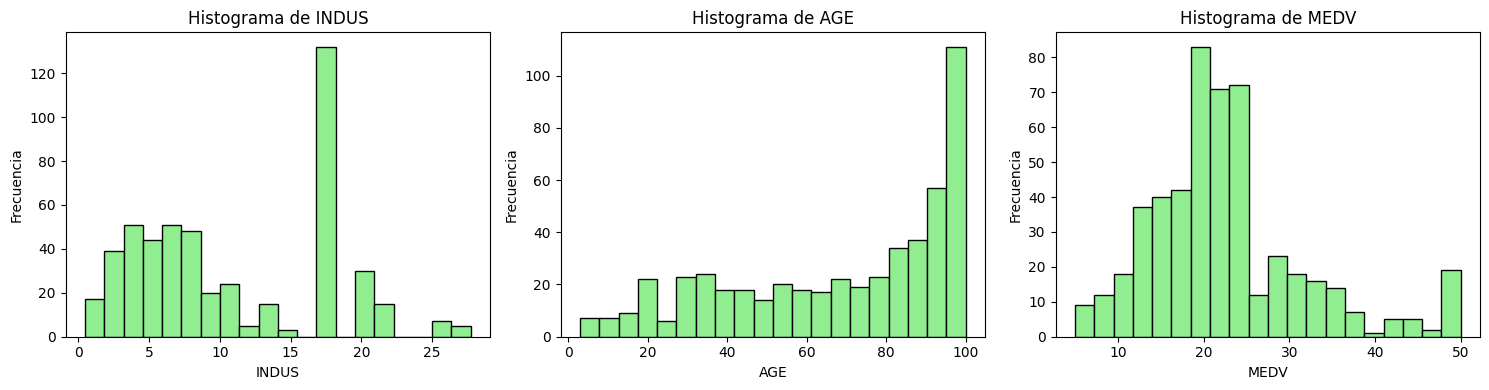

In [40]:
variables = ["INDUS", "AGE", "MEDV"]

plt.figure(figsize=(15,4))

for i, col in enumerate(variables):
    plt.subplot(1, 3, i+1)
    plt.hist(df[col], bins=20, color='lightgreen', edgecolor='black')
    plt.title(f"Histograma de {col}")
    plt.xlabel(col)
    plt.ylabel("Frecuencia")

plt.tight_layout()
plt.show()


### <font color='264CC7'> Análisis exploratorio de los datos </font>

<div style="background-color: #edf1f8; border-color: #264CC7; border-left: 5px solid #264CC7; padding: 0.5em;">
<strong>Ejercicio:</strong><br>
Realiza un gráfico del histograma de valores de la variable MEDV, separado por los posibles valores de CHAS. Para comparar mejor los valores de MEDV según las diferentes clases de CHAS, los histogramas deben estar sobrepuestos. Agrega una leyenda para identificar a qué clase corresponde cada histograma.
    
El objetivo es observar cómo se distribuye el valor de la respuesta MEDV en función de la clase CHAS, para identificar visualmente si este atributo categórico está relacionado con diferentes valores de la respuesta.
    
<hr>
Sugerencia: Usa la función "hist" de la librería "matplotlib", utilizando el parámetro "alpha" para que se aprecien los histogramas sobrepuestos.<br>
Sugerencia: Para una mejor comparación, considera representar la densidad de probabilidad en lugar del número de entradas por bin. Esto permite usar la misma escala para cada clase y facilita la comparación. Puedes usar el parámetro "density" de la misma función "hist".  
</div>

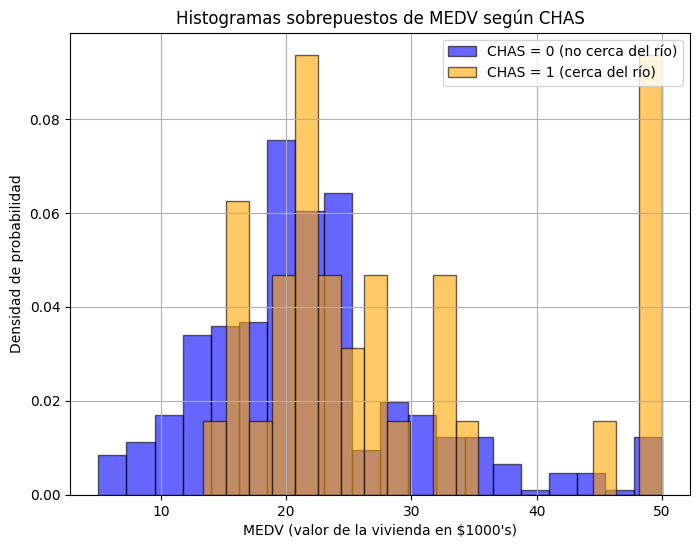

In [41]:
# Separar los conjuntos por cada valor de CHAS
medv_chas_0 = df[df["CHAS"] == 0]["MEDV"]
medv_chas_1 = df[df["CHAS"] == 1]["MEDV"]

plt.figure(figsize=(8,6))

# Histograma para CHAS = 0
plt.hist(medv_chas_0, bins=20, alpha=0.6, density=True,
         label="CHAS = 0 (no cerca del río)", color="blue", edgecolor="black")

# Histograma para CHAS = 1
plt.hist(medv_chas_1, bins=20, alpha=0.6, density=True,
         label="CHAS = 1 (cerca del río)", color="orange", edgecolor="black")

# Configuración del gráfico
plt.title("Histogramas sobrepuestos de MEDV según CHAS")
plt.xlabel("MEDV (valor de la vivienda en $1000's)")
plt.ylabel("Densidad de probabilidad")
plt.legend()
plt.grid(True)

plt.show()


<div style="background-color: #edf1f8; border-color: #264CC7; border-left: 5px solid #264CC7; padding: 0.5em;">
<strong>Análisis:</strong>
<br> Mirando los histogramas, ¿te parece que el atributo CHAS tendrá algún peso a la hora de predecir la mediana del precio de las casas, MEDV? ¿Porqué?
</div>

Sí, el atributo CHAS tiene cierta relevancia al predecir MEDV, ya que las casas cercanas al río tienden a mostrar valores más altos de la mediana del precio. Sin embargo, la fuerte superposición de ambos histogramas indica que esta influencia es limitada. CHAS aporta información, pero no es un predictor principal comparado con variables como RM, LSTAT o NOX.

<div style="background-color: #edf1f8; border-color: #264CC7; border-left: 5px solid #264CC7; padding: 0.5em;">
<strong>Ejercicio:</strong><br>
Calcula y muestra la correlación entre todos los atributos numéricos y la variable respuesta MEDV.
</div>


In [42]:
# Calcular la matriz de correlación
correlaciones = df.corr()

# Mostrar solo la correlación de cada atributo con MEDV
correlacion_medv = correlaciones["MEDV"].sort_values(ascending=False)

print("Correlación de los atributos numéricos con MEDV:\n")
print(correlacion_medv)


Correlación de los atributos numéricos con MEDV:

MEDV       1.000000
RM         0.695360
ZN         0.360445
B          0.333461
DIS        0.249929
CHAS       0.175260
AGE       -0.376955
RAD       -0.381626
CRIM      -0.388305
NOX       -0.427321
TAX       -0.468536
INDUS     -0.483725
PTRATIO   -0.507787
LSTAT     -0.737663
Name: MEDV, dtype: float64


<div style="background-color: #edf1f8; border-color: #264CC7; border-left: 5px solid #264CC7; padding: 0.5em;">
<strong>Ejercicio:</strong><br>
Representa gráficamente las relaciones entre todas las parejas de variables numéricas (sin incluir la variable respuesta) del conjunto de datos. El objetivo de este ejercicio es observar y analizar gráficamente las correlaciones entre las variables.
<hr>Sugerencia: Puedes usar la función "pairplot" de la librería 'seaborn'.
</div>


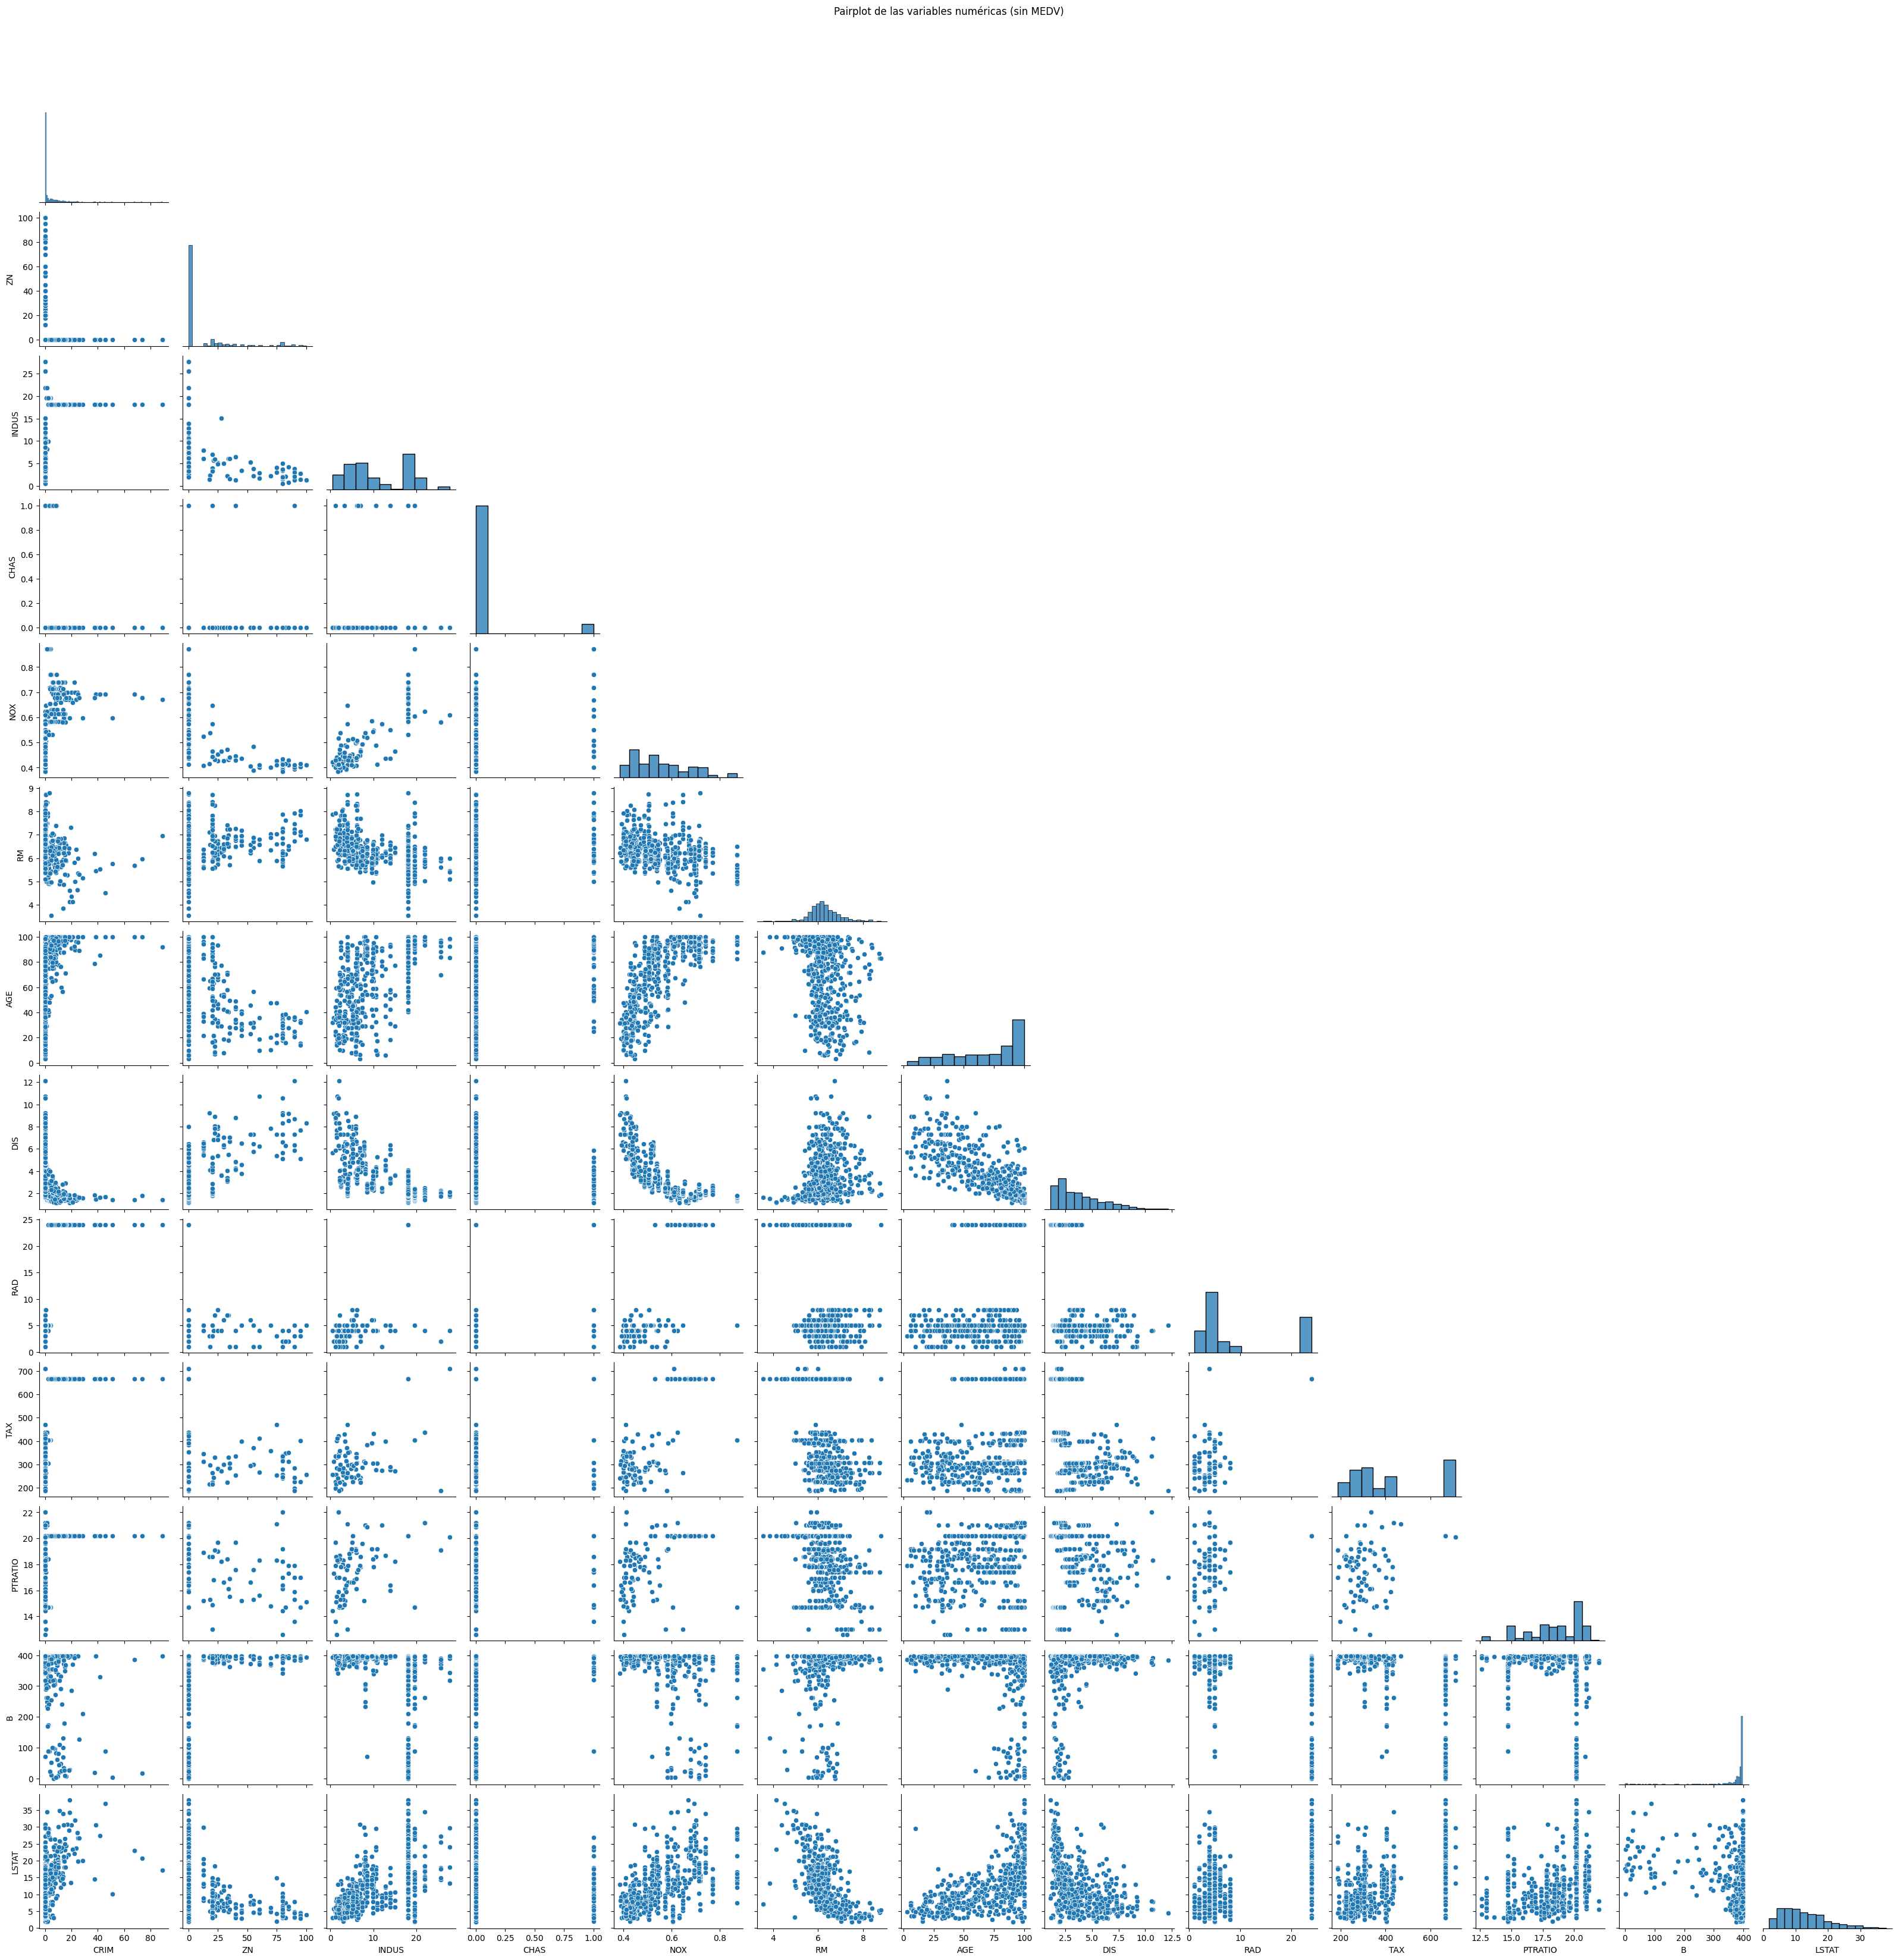

In [43]:
# Seleccionar todas las variables numéricas excepto MEDV
variables_numericas = df.drop(columns=["MEDV"])

# Crear el pairplot
sns.pairplot(variables_numericas, diag_kind="hist", corner=True)

plt.suptitle("Pairplot de las variables numéricas (sin MEDV)", y=1.02)
plt.show()


<div style="background-color: #edf1f8; border-color: #264CC7; border-left: 5px solid #264CC7; padding: 0.5em;">
<strong>Ejercicio:</strong><br>
Identifica los 2 atributos con la correlación más fuerte con la variable respuesta y los 2 con la correlación más débil (considerando el valor absoluto del coeficiente de correlación).
    
Para analizar las correlaciones gráficamente, representa, para cada uno de los 4 atributos identificados, un scatter plot con el atributo en el eje x y la respuesta en el eje y. Además, añade en cada gráfico una regresión lineal que ajuste los puntos.
        
<hr>Sugerencia: Puedes usar la función "regplot" de la librería 'seaborn'.
</div>


In [44]:
# Calcular correlaciones con MEDV
correlaciones = df.corr()["MEDV"].drop("MEDV")

# Ordenar por valor absoluto
correlaciones_ordenadas = correlaciones.abs().sort_values(ascending=False)

# Seleccionar las 2 más fuertes y 2 más débiles
fuertes = correlaciones_ordenadas.head(2).index.tolist()
debiles = correlaciones_ordenadas.tail(2).index.tolist()

print("Atributos con correlación más fuerte con MEDV:", fuertes)
print("Atributos con correlación más débil con MEDV:", debiles)


Atributos con correlación más fuerte con MEDV: ['LSTAT', 'RM']
Atributos con correlación más débil con MEDV: ['DIS', 'CHAS']


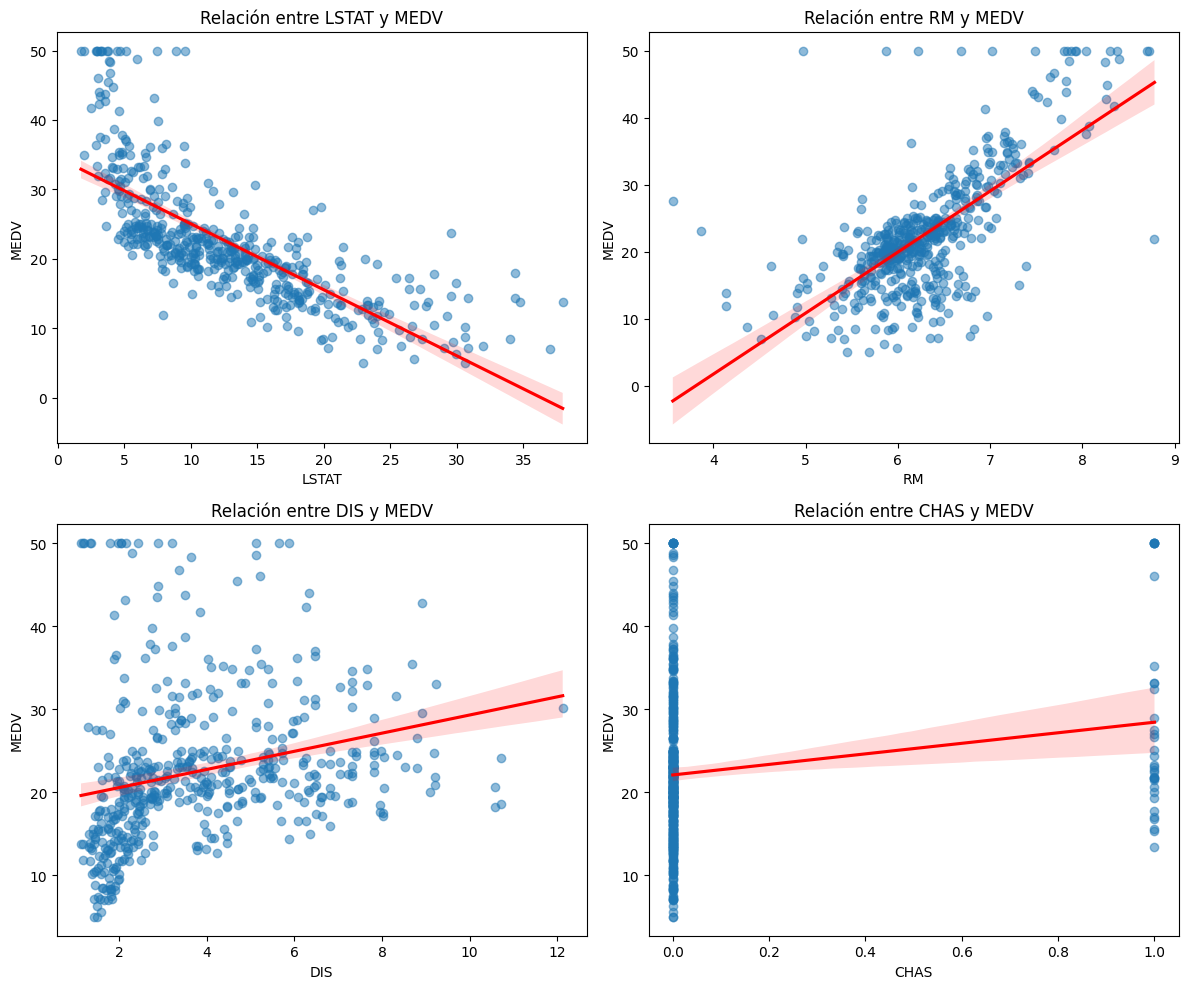

In [45]:
atributos = fuertes + debiles   # Los 4 atributos a graficar
plt.figure(figsize=(12,10))

for i, col in enumerate(atributos, 1):
    plt.subplot(2, 2, i)
    sns.regplot(x=df[col], y=df["MEDV"], scatter_kws={"alpha": 0.5}, line_kws={"color": "red"})
    plt.title(f"Relación entre {col} y MEDV")
    plt.xlabel(col)
    plt.ylabel("MEDV")

plt.tight_layout()
plt.show()


<div style="background-color: #edf1f8; border-color: #264CC7; border-left: 5px solid #264CC7; padding: 0.5em;">
<strong>Análisis:</strong>
<br> Observando los gráficos, comenta brevemente si logras visualizar las correlaciones altas o bajas que identificaste numéricamente.
</div>


Al mirar los gráficos, se ve cuáles variables están realmente relacionadas con el precio de las casas. En LSTAT y RM se ve la tendencia que siguen: cuando aumentan los valores de LSTAT, el precio cae rápido, y cuando aumentan las habitaciones (RM), el precio sube. En ambos casos, los puntos siguen muy bien la línea roja, lo que coincide con las correlaciones fuertes. En cambio, al ver DIS y CHAS es lo contrario. Aunque DIS muestra una inclinación ligeramente positiva, los puntos están muy dispersos, así que la relación es débil. Y con CHAS casi no se ve una forma, hay mucha variación dentro de cada uno. Esto confirma visualmente que estas dos variables tienen una influencia mucho menor sobre MEDV.

---
## <font color='264CC7'> Reducción de la dimensionalidad </font>


En este ejercicio aplicaremos métodos de reducción de dimensionalidad al conjunto original de datos. El objetivo es reducir el número de atributos a un nuevo conjunto con menos dimensiones, pero que conserven la máxima información posible presente en los atributos originales.


<div style="background-color: #edf1f8; border-color: #264CC7; border-left: 5px solid #264CC7; padding: 0.5em;">
<strong>Ejercicio:</strong><br>
<ul>
    <li>Aplica el método de reducción de dimensionalidad Principal Component Analysis (PCA) para reducir a 2 dimensiones el dataset original que contiene todos los atributos.</li>
    <li>Genera un gráfico con el resultado del PCA, mostrando los valores de las dos componentes principales en los ejes x e y, y utilizando una escala de colores para representar el valor de la respuesta MEDV. El objetivo es visualizar cómo varía MEDV en función de las componentes principales generadas.</li>
</ul>
    
NOTA: Asegúrate de no incluir la variable objetivo "MEDV" en la reducción de dimensionalidad. Queremos explicar la variable objetivo en función del resto de variables reducidas a dos dimensiones.

<hr>
Sugerencia: No necesitas programar el algoritmo de PCA desde cero, puedes usar la implementación disponible en la librería "scikit-learn".<br>
Sugerencia: Para el gráfico, utiliza el scatter plot de matplotlib con el parámetro "c" para asignar los colores de los puntos según los valores de la variable objetivo.
</div>


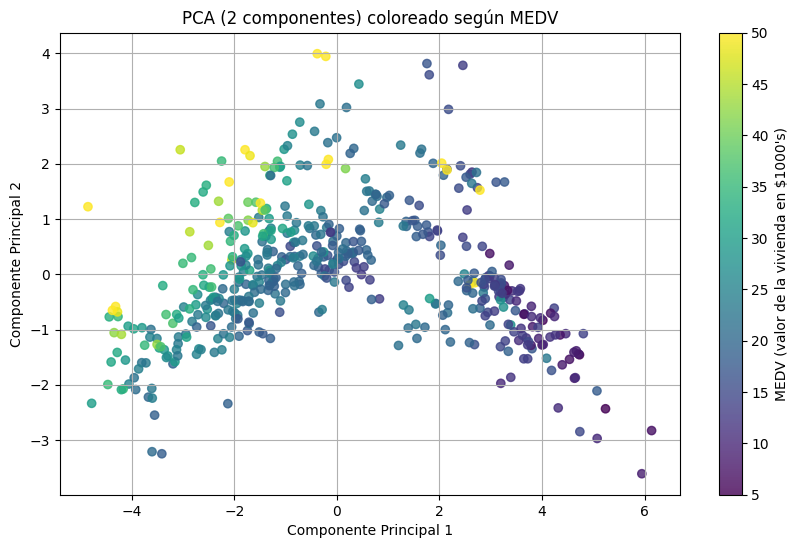

In [46]:
# 1. Separar características y respuesta
X = df.drop(columns=["MEDV"])  # todas las variables excepto la respuesta
y = df["MEDV"]                 # variable objetivo (solo para colorear)

# 2. Escalamiento (muy importante antes de PCA)
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# 3. Aplicar PCA a 2 componentes
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

# Convertir a DataFrame solo para graficar mejor
pca_df = pd.DataFrame(data=X_pca, columns=["PC1", "PC2"])
pca_df["MEDV"] = y

# 4. Gráfico PCA coloreado por MEDV
plt.figure(figsize=(10,6))
scatter = plt.scatter(
    pca_df["PC1"],
    pca_df["PC2"],
    c=pca_df["MEDV"],
    cmap="viridis",
    alpha=0.8
)

plt.colorbar(scatter, label="MEDV (valor de la vivienda en $1000's)")
plt.xlabel("Componente Principal 1")
plt.ylabel("Componente Principal 2")
plt.title("PCA (2 componentes) coloreado según MEDV")
plt.grid(True)
plt.show()


<div style="background-color: #edf1f8; border-color: #264CC7; border-left: 5px solid #264CC7; padding: 0.5em;">
<strong>Ejercicio:</strong><br>
<ul>
    <li>Aplica la reducción de dimensionalidad usando TSNE. Puedes encontrar más información sobre este algoritmo en el siguiente enlace: <a href="https://distill.pub/2016/misread-tsne">https://distill.pub/2016/misread-tsne/</a></li>
    <li>Al igual que antes, genera un gráfico con el resultado del TSNE, mostrando en los ejes x e y los valores de las 2 nuevas dimensiones, y utiliza una escala de colores para representar el valor de la respuesta MEDV.</li>
</ul>

<hr>
Sugerencia: No necesitas programar el algoritmo TSNE desde cero, puedes usar la implementación disponible en la librería "scikit-learn".<br>
Sugerencia: Además de especificar el número de componentes, experimenta con los parámetros "learning_rate" y "perplexity".<br>
Sugerencia: Para el gráfico, utiliza el scatter plot de matplotlib con el parámetro "c" para asignar los colores de los puntos según los valores de la variable objetivo.
</div>


/usr/local/lib/python3.12/dist-packages/sklearn/manifold/_t_sne.py:1164: FutureWarning: 'n_iter' was renamed to 'max_iter' in version 1.5 and will be removed in 1.7.
  warnings.warn(


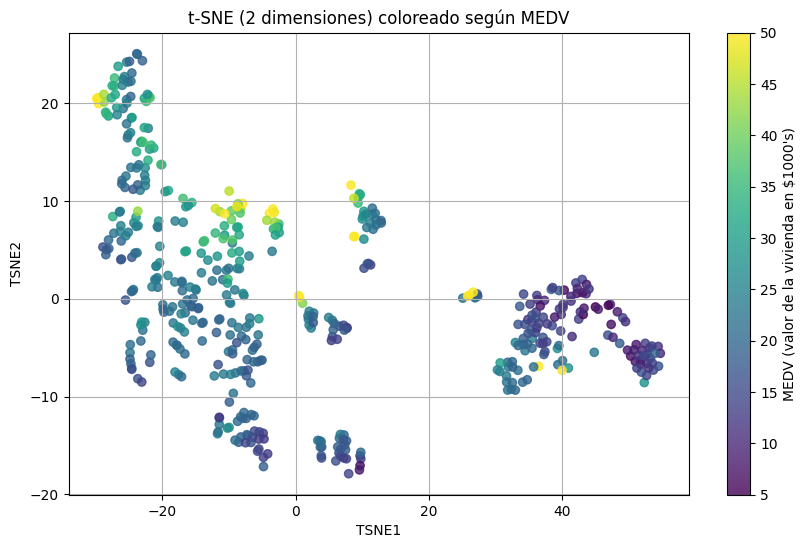

,PC1,PC2
CRIM,0.250951,-0.315252
ZN,-0.256315,-0.323313
INDUS,0.346672,0.112493
CHAS,0.005042,0.454829
NOX,0.342852,0.219116
RM,-0.189243,0.149332
AGE,0.313671,0.311978
DIS,-0.321544,-0.349070
RAD,0.319793,-0.271521
TAX,0.338469,-0.239454


In [49]:
# 1. Separar los datos
X = df.drop(columns=["MEDV"])   # atributos sin la variable respuesta
y = df["MEDV"]                  # solo para colorear

# 2. Escalar datos (muy necesario para TSNE)
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# 3. Aplicar TSNE
tsne = TSNE(
    n_components=2,
    perplexity=30,        # prueba valores entre 5 y 50
    learning_rate=200,    # prueba 10, 50, 200, 500
    n_iter=1000,
    random_state=42
)

X_tsne = tsne.fit_transform(X_scaled)

# Convertir a DataFrame para graficar mejor
tsne_df = pd.DataFrame(X_tsne, columns=["TSNE1", "TSNE2"])
tsne_df["MEDV"] = y

# 4. Gráfico TSNE coloreado por MEDV
plt.figure(figsize=(10,6))

scatter = plt.scatter(
    tsne_df["TSNE1"],
    tsne_df["TSNE2"],
    c=tsne_df["MEDV"],
    cmap="viridis",
    alpha=0.8
)

plt.colorbar(scatter, label="MEDV (valor de la vivienda en $1000's)")
plt.title("t-SNE (2 dimensiones) coloreado según MEDV")
plt.xlabel("TSNE1")
plt.ylabel("TSNE2")
plt.grid(True)
plt.show()

# Cargas del PCA (relación entre variables originales y componentes)
loadings = pd.DataFrame(
    pca.components_.T,
    columns=["PC1", "PC2"],
    index=X.columns
)

loadings



<div style="background-color: #edf1f8; border-color: #264CC7; border-left: 5px solid #264CC7; padding: 0.5em;">
<strong>Análisis:</strong>
<br> Observando los dos gráficos, ¿consideras que la reducción de dimensionalidad ha funcionado adecuadamente? ¿Crees que las 2 nuevas dimensiones logran explicar la variación de MEDV y permiten visualizar de manera diferenciada los precios altos y bajos? Si utilizáramos las 2 nuevas variables para predecir MEDV, ¿con cuál de los dos métodos de reducción de dimensionalidad (PCA o TSNE) obtendríamos mejores resultados?
    
¿Por qué crees que obtenemos resultados tan diferentes entre ambos métodos?
</div>


Al observar los dos gráficos, se puede decir que la reducción de dimensionalidad sí funciona, pero cada método lo hace de manera distinta. En el caso de PCA, las dos nuevas dimensiones no consiguen separar claramente los precios altos y bajos de las viviendas; la mayor parte de los puntos aparece mezclada, lo que indica que estas componentes no explican muy bien la variación de MEDV. En cambio, con t-SNE se observa una organización más clara de los datos, donde ciertos colores se agrupan mejor, lo que sugiere que este método capta mejor relaciones no lineales entre las variables originales y los valores de MEDV. Sin embargo, si quisiéramos usar solo las dos nuevas dimensiones para predecir MEDV, PCA sería la mejor opción, ya que produce componentes estables, lineales y aptas para modelos predictivos, mientras que t-SNE no sirve para predicción. La razón por la que obtenemos resultados tan diferentes es que PCA es un método lineal que busca explicar la máxima varianza global, mientras que t-SNE es un método no lineal pensado para preservar similitudes locales y formar agrupamientos, por lo que su objetivo y comportamiento son totalmente distintos.

---
## <font color='264CC7'> Entrenamiento y test </font>

En este último ejercicio se trata de aplicar un método de aprendizaje supervisado, concretamente el Linear Regression y K-means, para predecir las variables MEDV y CHAS, resectivamente, y evaluar la precisión obtenida con los modelo. Para eso usaremos:
<ul>
    <li>El conjunto de datos original con todos los atributos</li>
    <li>El conjunto de datos reducido a sólo 2 atributos con PCA</li>
</ul>

Divide los datos en dos conjuntos: uno para entrenamiento y otro para prueba y visualiza la dimensión de cada conjunto. Usar `random_state` igual al últmo número de tu cédula.

In [55]:
from sklearn.model_selection import train_test_split

# ===== Dataset original =====
X_original = df.drop(columns=["MEDV", "CHAS"])
y_medv = df["MEDV"]    # para regresión
y_chas = df["CHAS"]    # para clasificación

# ===== Dataset PCA (2 dimensiones) =====
# X_pca ya debe estar creado en ejercicios previos
X_pca_df = pd.DataFrame(X_pca, columns=["PC1", "PC2"])
random_state = 1  # Mi numero de cedula termina en 1
X_train_orig_medv, X_test_orig_medv, y_train_orig_medv, y_test_orig_medv = train_test_split(
    X_original, y_medv, test_size=0.3, random_state=random_state
)

print("Dataset ORIGINAL - MEDV")
print("X_train:", X_train_orig_medv.shape)
print("X_test:", X_test_orig_medv.shape)
print("y_train:", y_train_orig_medv.shape)
print("y_test:", y_test_orig_medv.shape)
print("--------------------------------------")
X_train_orig_chas, X_test_orig_chas, y_train_orig_chas, y_test_orig_chas = train_test_split(
    X_original, y_chas, test_size=0.3, random_state=random_state
)

print("Dataset ORIGINAL - CHAS")
print("X_train:", X_train_orig_chas.shape)
print("X_test:", X_test_orig_chas.shape)
print("y_train:", y_train_orig_chas.shape)
print("y_test:", y_test_orig_chas.shape)
print("--------------------------------------")

X_train_pca_medv, X_test_pca_medv, y_train_pca_medv, y_test_pca_medv = train_test_split(
    X_pca_df, y_medv, test_size=0.3, random_state=random_state
)

print("Dataset PCA - MEDV")
print("X_train:", X_train_pca_medv.shape)
print("X_test:", X_test_pca_medv.shape)
print("y_train:", y_train_pca_medv.shape)
print("y_test:", y_test_pca_medv.shape)
print("--------------------------------------")
X_train_pca_chas, X_test_pca_chas, y_train_pca_chas, y_test_pca_chas = train_test_split(
    X_pca_df, y_chas, test_size=0.3, random_state=random_state
)

print("Dataset PCA - CHAS")
print("X_train:", X_train_pca_chas.shape)
print("X_test:", X_test_pca_chas.shape)
print("y_train:", y_train_pca_chas.shape)
print("y_test:", y_test_pca_chas.shape)




Dataset ORIGINAL - MEDV
X_train: (354, 12)
X_test: (152, 12)
y_train: (354,)
y_test: (152,)
--------------------------------------
Dataset ORIGINAL - CHAS
X_train: (354, 12)
X_test: (152, 12)
y_train: (354,)
y_test: (152,)
--------------------------------------
Dataset PCA - MEDV
X_train: (354, 2)
X_test: (152, 2)
y_train: (354,)
y_test: (152,)
--------------------------------------
Dataset PCA - CHAS
X_train: (354, 2)
X_test: (152, 2)
y_train: (354,)
y_test: (152,)


### <font color='264CC7'> Regresión </font>

<div style="background-color: #edf1f8; border-color: #264CC7; border-left: 5px solid #264CC7; padding: 0.5em;">
<strong>Ejercicio:</strong><br>
Usando el conjunto de datos original:
    
<ul>
    <li>Divide el dataset en train y test.</li>
    <li>Define un modelo Linear Regression.</li>
    <li>Aplica validación cruzada con el modelo definido y el dataset de train (con cv=5 es suficiente).</li>
    <li>Como métricas para cuantificar el error del modelo, utiliza R2 (coeficiente de determinación) y MAE (media del error absoluto) separadamente.</li>
    <li>Calcula la media y la desviación estándar del error obtenido en cada caso.</li>
</ul>
    
<hr>
Sugerencia: Para aplicar validación cruzada, utiliza 'cross_val_score' de sklearn y modifica su parámetro 'scoring' si es necesario.<br>
</div>


In [56]:
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.linear_model import LinearRegression
from sklearn.metrics import make_scorer, mean_absolute_error
import numpy as np

# 1. Preparar datos del dataset original
X = df.drop(columns=["MEDV", "CHAS"])   # atributos predictivos
y = df["MEDV"]                          # variable respuesta

# 2. Dividir en train y test
random_state = 7  # Reemplaza este número con el último dígito de tu cédula

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=random_state
)

print("Dimensión de X_train:", X_train.shape)
print("Dimensión de X_test:", X_test.shape)
print("Dimensión de y_train:", y_train.shape)
print("Dimensión de y_test:", y_test.shape)

# 3. Definir el modelo
modelo = LinearRegression()

# 4. Validación cruzada con R²
r2_scores = cross_val_score(modelo, X_train, y_train, cv=5, scoring="r2")

print("\nR² scores en cada fold:", r2_scores)
print("R² promedio:", np.mean(r2_scores))
print("R² desviación estándar:", np.std(r2_scores))

# 5. Validación cruzada con MAE
mae_scorer = make_scorer(mean_absolute_error, greater_is_better=False)

mae_scores = cross_val_score(modelo, X_train, y_train, cv=5, scoring=mae_scorer)

# MAE se devuelve como negativo, así que cambiamos el signo
mae_scores = -mae_scores

print("\nMAE en cada fold:", mae_scores)
print("MAE promedio:", np.mean(mae_scores))
print("MAE desviación estándar:", np.std(mae_scores))


Dimensión de X_train: (354, 12)
Dimensión de X_test: (152, 12)
Dimensión de y_train: (354,)
Dimensión de y_test: (152,)

R² scores en cada fold: [0.66469705 0.62827222 0.66868095 0.83440531 0.81444534]
R² promedio: 0.7221001737922541
R² desviación estándar: 0.08496174344217694

MAE en cada fold: [4.16097663 3.38046956 4.07535308 2.73486891 2.9207496 ]
MAE promedio: 3.4544835532997267
MAE desviación estándar: 0.5818602385169306


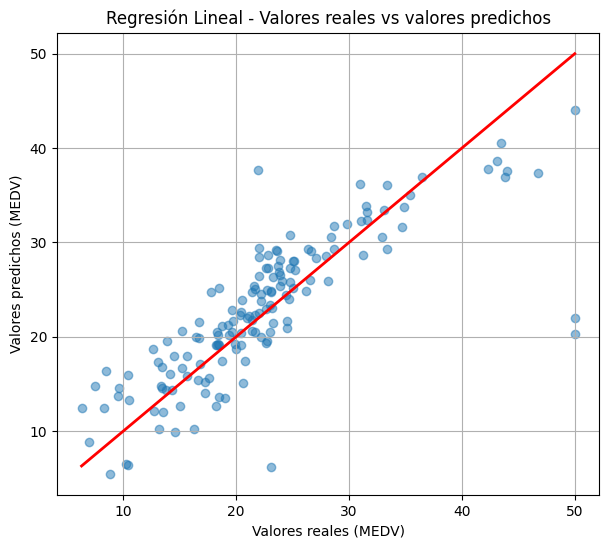

In [60]:
# Entrenar el modelo con los datos de entrenamiento
modelo.fit(X_train, y_train)

# Predicciones sobre el set de prueba
y_pred = modelo.predict(X_test)

# Gráfico real vs predicho
plt.figure(figsize=(7,6))
plt.scatter(y_test, y_pred, alpha=0.5)
plt.plot([y_test.min(), y_test.max()],
         [y_test.min(), y_test.max()],
         color="red", linewidth=2)

plt.xlabel("Valores reales (MEDV)")
plt.ylabel("Valores predichos (MEDV)")
plt.title("Regresión Lineal - Valores reales vs valores predichos")
plt.grid(True)
plt.show()


<div style="background-color: #edf1f8; border-color: #264CC7; border-left: 5px solid #264CC7; padding: 0.5em;">
<strong>Ejercicio:</strong><br>
Repite el mismo procedimiento que en el ejercicio anterior, pero utilizando el dataset reducido a 2 dimensiones con PCA.
</div>


Dimensiones dataset PCA:
X_train: (354, 2)
X_test: (152, 2)
y_train: (354,)
y_test: (152,)

R² (5-fold CV): [0.44046743 0.30000293 0.4920193  0.51584177 0.50657512]
R² promedio: 0.45098131307984274
R² desviación estándar: 0.07985822414120562

MAE (5-fold CV): [5.37695615 4.86120195 5.07842606 4.75119072 4.83206812]
MAE promedio: 4.97996859980426
MAE desviación estándar: 0.22610279633200656


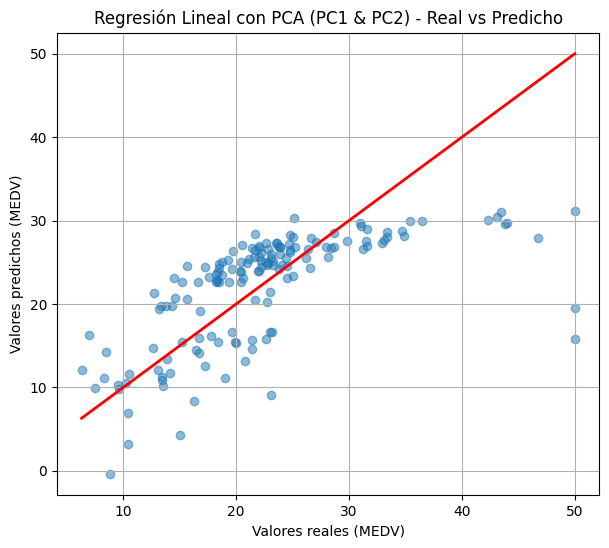

In [62]:
# 1. Dataset PCA → solo PC1 y PC2
X_pca_df = pd.DataFrame(X_pca, columns=["PC1", "PC2"])
y = df["MEDV"]   # respuesta

# 2. Dividir dataset PCA
random_state = 7  # recuerda cambiarlo por el último dígito de tu cédula

X_train, X_test, y_train, y_test = train_test_split(
    X_pca_df, y, test_size=0.3, random_state=random_state
)

print("Dimensiones dataset PCA:")
print("X_train:", X_train.shape)
print("X_test:", X_test.shape)
print("y_train:", y_train.shape)
print("y_test:", y_test.shape)

# 3. Definir modelo Linear Regression
modelo = LinearRegression()

# 4. Validación cruzada - R²
r2_scores = cross_val_score(
    modelo, X_train, y_train, cv=5, scoring="r2"
)

print("\nR² (5-fold CV):", r2_scores)
print("R² promedio:", np.mean(r2_scores))
print("R² desviación estándar:", np.std(r2_scores))
# 5. Validación cruzada - MAE
mae_scorer = make_scorer(mean_absolute_error, greater_is_better=False)

mae_scores = cross_val_score(
    modelo, X_train, y_train, cv=5, scoring=mae_scorer
)

mae_scores = -mae_scores  # cambiar signo

print("\nMAE (5-fold CV):", mae_scores)
print("MAE promedio:", np.mean(mae_scores))
print("MAE desviación estándar:", np.std(mae_scores))

# 6. Entrenar modelo final
modelo.fit(X_train, y_train)
y_pred = modelo.predict(X_test)

# 7. Gráfico de regresión (real vs predicho)
plt.figure(figsize=(7,6))
plt.scatter(y_test, y_pred, alpha=0.5)
plt.plot([y_test.min(), y_test.max()],
         [y_test.min(), y_test.max()],
         color="red", linewidth=2)

plt.xlabel("Valores reales (MEDV)")
plt.ylabel("Valores predichos (MEDV)")
plt.title("Regresión Lineal con PCA (PC1 & PC2) - Real vs Predicho")
plt.grid(True)
plt.show()


<div style="background-color: #edf1f8; border-color: #264CC7; border-left: 5px solid #264CC7; padding: 0.5em;">
<strong>Análisis:</strong><br>
¿Con qué datos ha funcionado mejor el modelo? ¿Tiene sentido el resultado? ¿Está alineado con los resultados observados en el ejercicio 3?
</div>


El modelo funciona claramente mejor cuando utilizamos el dataset original con todas las variables en lugar del dataset reducido a solo dos componentes PCA. Esto tiene sentido, ya que al comprimir toda la información a dos dimensiones se pierde mucha variabilidad relevante para predecir MEDV, lo que se refleja en un R² más bajo y un MAE más alto. Además, este resultado coincide con lo observado en el ejercicio 3, donde el gráfico del PCA mostraba que las dos componentes principales no lograban separar bien los precios altos y bajos, indicando que no capturan suficiente información para realizar una buena predicción. Por eso, es completamente esperable que el modelo original supere ampliamente al modelo basado en PCA.

<div style="background-color: #edf1f8; border-color: #264CC7; border-left: 5px solid #264CC7; padding: 0.5em;">
<strong>Ejercicio:</strong><br>
Con el mejor modelo que hayas obtenido:
    
<ul>
  <li>Genera predicciones sobre el dataset de test.</li>
  <li>Calcula la precisión de las predicciones obtenidas usando R2 (coeficiente de determinación) y MAE (media del error absoluto).</li>
</ul>

<hr>
Sugerencia: Para calcular R2 y MAE, utiliza las funciones disponibles en el módulo "metrics" de sklearn.
</div>


In [64]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_absolute_error
# 1. Entrenar el mejor modelo
modelo = LinearRegression()
modelo.fit(X_train, y_train)

# 2. Generar predicciones
y_pred = modelo.predict(X_test)

# 3. Calcular métricas R2 y MAE
r2 = r2_score(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)

print("Resultados del mejor modelo (Dataset original):")
print("R²  =", r2)
print("MAE =", mae)


Resultados del mejor modelo (Dataset original):
R²  = 0.39982063837208537
MAE = 4.79575994085369


<div style="background-color: #edf1f8; border-color: #264CC7; border-left: 5px solid #264CC7; padding: 0.5em;">
<strong>Análisis:</strong><br>
¿Cuál de las dos métricas propuestas para evaluar los modelos (R2 o MAE) usarías para explicar la calidad del modelo a un ejecutivo de una inmobiliaria? ¿Y cuál usarías para explicarlo a un analista matemático de la misma compañía? ¿Por qué?  
</div>


Si tuviera que presentar los resultados del modelo a un ejecutivo de una inmobiliaria, utilizaría la métrica MAE, ya que expresa el error en unidades monetarias fácilmente interpretables y permite comunicar de forma directa cuánto se equivoca el modelo en promedio, algo muy relevante para decisiones de negocio. En cambio, para un analista matemático usaría R², porque describe qué proporción de la variación total del precio es explicada por el modelo y ofrece una medida más técnica y estandarizada de la calidad del ajuste. Cada métrica es adecuada según el nivel de detalle y el tipo de interpretación que requiere cada perfil.

### <font color='264CC7'> Clasificación </font>

<div style="background-color: #edf1f8; border-color: #264CC7; border-left: 5px solid #264CC7; padding: 0.5em;">
<strong>Ejercicio:</strong><br>
Usando el conjunto de datos original:
    
<ul>
    <li>Divide el dataset en train y test.</li>
    <li>Define un modelo K-means.</li>
    <li>Como métricas para cuantificar el error del modelo, utiliza la precisión, la sensibilidad y f1-score.</li>
</ul>



In [70]:
from sklearn.model_selection import train_test_split
from sklearn.cluster import KMeans
from sklearn.metrics import accuracy_score, recall_score, f1_score
import numpy as np
import pandas as pd

# 1. Separar X e y

X = df.drop(columns=["MEDV", "CHAS"])
y = df["CHAS"]

# 2. División train / test
random_state = 7  # reemplaza por el último dígito de tu cédula

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=random_state
)

print("X_train:", X_train.shape)
print("X_test:", X_test.shape)
# 3. Definir K-means (2 clusters)
kmeans = KMeans(n_clusters=2, random_state=random_state)
kmeans.fit(X_train)

# 4. Predecir clusters en test
clusters_test = kmeans.predict(X_test)

# 5. Asignar clusters → clases reales
#    (ESTA es la parte corregida)

# Primero predecimos los clusters del TRAIN
clusters_train = kmeans.predict(X_train)

# Crear tabla que asocia cluster con clase real
mapping = {}

for cluster_label in np.unique(clusters_train):
    # valores reales de CHAS para este cluster
    real_labels = y_train[clusters_train == cluster_label]

    # asignamos la clase mayoritaria
    majority_class = real_labels.mode()[0]

    mapping[cluster_label] = majority_class

# Aplicamos el mapeo a las predicciones del test
y_pred = np.array([mapping[c] for c in clusters_test])

# 6. Métricas del modelo
accuracy = accuracy_score(y_test, y_pred)
sensitivity = recall_score(y_test, y_pred)   # recall = sensibilidad
f1 = f1_score(y_test, y_pred)

print("\nResultados del modelo K-means como clasificador de CHAS:")
print("Precisión:", accuracy)
print("Sensibilidad:", sensitivity)
print("F1-score:", f1)


X_train: (354, 12)
X_test: (152, 12)

Resultados del modelo K-means como clasificador de CHAS:
Precisión: 0.9473684210526315
Sensibilidad: 0.0
F1-score: 0.0


<div style="background-color: #edf1f8; border-color: #264CC7; border-left: 5px solid #264CC7; padding: 0.5em;">
<strong>Ejercicio:</strong><br>
Repite el mismo procedimiento que en el ejercicio anterior, pero utilizando el dataset reducido a 2 dimensiones con PCA.
</div>


In [69]:


# 1. Dataset PCA: convertir PC1 y PC2 a DataFrame
X_pca_df = pd.DataFrame(X_pca, columns=["PC1", "PC2"])
y = df["CHAS"]   # usamos CHAS como clase

# 2. División train/test
random_state = 7  # reemplaza por el último dígito de tu cédula

X_train, X_test, y_train, y_test = train_test_split(
    X_pca_df, y, test_size=0.3, random_state=random_state
)

print("X_train:", X_train.shape)
print("X_test:", X_test.shape)

# 3. Definir y entrenar K-means
kmeans = KMeans(n_clusters=2, random_state=random_state)
kmeans.fit(X_train)

# 4. Predecir clusters en train y test
clusters_train = kmeans.predict(X_train)
clusters_test = kmeans.predict(X_test)


# 5. Mapear clusters → clases reales (método correcto)

mapping = {}

for cluster_label in np.unique(clusters_train):
    real_labels = y_train[clusters_train == cluster_label]
    majority_class = real_labels.mode()[0]
    mapping[cluster_label] = majority_class

# Aplicamos el mapeo a los clusters del test
y_pred = np.array([mapping[c] for c in clusters_test])

# 6. Métricas de evaluación

accuracy = accuracy_score(y_test, y_pred)
sensitivity = recall_score(y_test, y_pred)   # recall = sensibilidad
f1 = f1_score(y_test, y_pred)

print("\nResultados de K-means usando PCA (PC1 y PC2):")
print("Precisión:", accuracy)
print("Sensibilidad:", sensitivity)
print("F1-score:", f1)


X_train: (354, 2)
X_test: (152, 2)

Resultados de K-means usando PCA (PC1 y PC2):
Precisión: 0.9473684210526315
Sensibilidad: 0.0
F1-score: 0.0


<div style="background-color: #edf1f8; border-color: #264CC7; border-left: 5px solid #264CC7; padding: 0.5em;">
<strong>Análisis:</strong><br>
¿Cuál de las dos métricas propuestas para evaluar los modelos (precisión, sensibilidad o f1-score) usarías para explicar la calidad del modelo a un ejecutivo de una inmobiliaria? ¿Y cuál usarías para explicarlo a un analista matemático de la misma compañía? ¿Por qué? ¿El modelo es mejor discriminando o acertando? ¿Cómo se interpreta esto último?


Para comunicar el rendimiento del modelo a un ejecutivo de una inmobiliaria, la métrica más adecuada es la precisión, ya que ofrece una visión simple y directa del porcentaje total de aciertos del modelo. Sin embargo, para un analista matemático la mejor opción es el F1-score, porque combina precisión y sensibilidad y refleja mejor el desempeño real cuando las clases están desbalanceadas, como ocurre con CHAS. En este caso, el modelo muestra buena capacidad de “acertar” en general, pero es malo discriminando la clase minoritaria, lo cual significa que detecta muy bien las casas que no están cerca del río, pero tiene dificultad para identificar aquellas que sí lo están. Esto explica por qué la precisión puede ser alta, mientras que la sensibilidad y el F1-score son bajos.